# <center> Bank loan prediction model </center>

# 1. Introduction
## Background & Context

To minimize loss from the bank’s perspective, the bank needs a decision rule regarding whom to approve the loan and whom not to. An applicant’s demographic and socio-economic profiles are considered by loan managers before a decision is taken regarding his/her loan application.

In this dataset, each entry represents a person who takes credit from a bank. Each person is classified as a good or bad credit risk according to the set of attributes. 

## Objective

To build a predictive model on this data to help the bank decide on whether to approve a loan to a prospective applicant.

## Data Dictionary

- Age (Numeric: Age in years)

- Sex (Categories: male, female)

- Job (Categories: unskilled and non-resident, unskilled and resident, skilled, highly skilled)

- Housing (Categories: own, rent, or free)

- Saving accounts (Categories: little, moderate, quite rich, rich)

- Checking account (Categories: little, moderate, rich)

- Credit amount (Numeric: Amount of credit in DM - Deutsche Mark)

- Duration (Numeric: Duration for which the credit is given in months)

- Purpose (Categories: car, furniture/equipment,radio/TV, domestic appliances, repairs, education, business, vacation/others)

- Risk (0 - Person is not at risk, 1 - Person is at risk(defaulter))

# 2. Loading libraries & data

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
)

# to suppress warnings
import warnings

warnings.filterwarnings("ignore")

In [42]:
data = pd.read_csv("German_Credit.csv")
print(f"There are {data.shape[0]} rows and {data.shape[1]} columns.")

There are 1000 rows and 10 columns.


# 3. Looking at the data

- First look at the data
- Look to the data types
- Look for unique values
- Look for missing values

In [43]:
# let's create a copy of the data
df = data.copy()

# let us have a first look at the data
df.head(n=10)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,0
1,22,female,2,own,little,moderate,5951,48,radio/TV,1
2,49,male,1,own,little,NaN,2096,12,education,0
3,45,male,2,free,little,little,7882,42,furniture/equipment,0
4,53,male,2,free,little,little,4870,24,car,1
5,35,male,1,free,NaN,NaN,9055,36,education,0
6,53,male,2,own,quite rich,NaN,2835,24,furniture/equipment,0
7,35,male,3,rent,little,moderate,6948,36,car,0
8,61,male,1,own,rich,NaN,3059,12,radio/TV,0
9,28,male,3,own,little,moderate,5234,30,car,1


In [44]:
df.tail(n=10)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
990,37,male,1,own,NaN,NaN,3565,12,education,0
991,34,male,1,own,moderate,NaN,1569,15,radio/TV,0
992,23,male,1,rent,NaN,little,1936,18,radio/TV,0
993,30,male,3,own,little,little,3959,36,furniture/equipment,0
994,50,male,2,own,NaN,NaN,2390,12,car,0
995,31,female,1,own,little,NaN,1736,12,furniture/equipment,0
996,40,male,3,own,little,little,3857,30,car,0
997,38,male,2,own,little,NaN,804,12,radio/TV,0
998,23,male,2,free,little,little,1845,45,radio/TV,1
999,27,male,2,own,moderate,moderate,4576,45,car,0


In [45]:
# Let us have a look at the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   int64 
dtypes: int64(5), object(5)
memory usage: 78.2+ KB


In [46]:
# Let us have a look at the unique values for object data type columns

cat_columns = df.describe(include=["object"]).columns
cat_columns

for i in cat_columns:
    if i in df.columns:
        print("Unique values in", i, "are:")
        print(df[i].value_counts())
        print("*" * 50)

Unique values in Sex are:
male      690
female    310
Name: Sex, dtype: int64
**************************************************
Unique values in Housing are:
own     713
rent    179
free    108
Name: Housing, dtype: int64
**************************************************
Unique values in Saving accounts are:
little        603
moderate      103
quite rich     63
rich           48
Name: Saving accounts, dtype: int64
**************************************************
Unique values in Checking account are:
little      274
moderate    269
rich         63
Name: Checking account, dtype: int64
**************************************************
Unique values in Purpose are:
car                    337
radio/TV               280
furniture/equipment    181
business                97
education               59
repairs                 22
domestic appliances     12
vacation/others         12
Name: Purpose, dtype: int64
**************************************************


* Some variable's name contains space which we will remove to keep uniformity among the column names.
* The dependent variable in this context is referred to as `Risk`, and it is of an integer type. Additionally, it is already in a binary format.
* `Age`, `Job`, `Credit amount` and `Duration` are of integer type while other variables are of categorical type.
* `Savings accounts` and `Checking account` data show a significant amount of null rows. These missing information can affect the prediction model as both data can be related to the risk of not paying the loan.
* Data is well categorized in all the categorical values.

In [47]:
# fixing the names of columns as there are spaces in some column's names
df.columns = [col.replace(" ", "_") for col in data.columns]
print(df.columns)

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving_accounts', 'Checking_account',
       'Credit_amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')


# 4. Exploratory Data Analysis

In [48]:
# Basic summary stats - Numeric variables
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1000.0,35.546,11.375469,19.0,27.0,33.0,42.00,75.0
Job,1000.0,1.904,0.653614,0.0,2.0,2.0,2.00,3.0
Credit_amount,1000.0,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
Duration,1000.0,20.903,12.058814,4.0,12.0,18.0,24.00,72.0
Risk,1000.0,0.300,0.458487,0.0,0.0,0.0,1.00,1.0


### Summary of the dataset

* `Age`: Average age of people in the dataset is 35 years, age has a wide range from 19 to 75 years.
* `Job`: Numbers range from 0 to 3, which represents the categories unskilled and non-resident, unskilled and resident, skilled, highly skilled. In that sense we can say the median is 2 (skilled job) and this is the only cagegory present in the IQR.
* `Credit_amount`: In average, the loan amount is DM 3271.26 and the range is DN 2,822 to DM 18,424. The difference between 3rd quartile and max value, suggest we can have one or more outliers.
* `Duration`: Average duration is 21 months, but the range is 4-72 months.

### Diving a little further on the data

In [49]:
# Creating a function to support on the data analysis

def countplot_absrel(data,feature,xlbl,ylbl,ttl,figsize=(6,4),hue=None,barlabel=True):

    """
    Plot countplot graph with absolute and relative labels over the bars

    data: dataframe
    feature: dataframe column
    xlbl: label for x-axis
    ylbl: label for y-axis
    ttl: chart title
    figsize: size of figure (default (6,4))
    hue: variable to hue
    barlabel: Boolean value to apply or not barlabels
    """
    
    plt.figure(figsize=figsize)
    ax = sns.countplot(x=feature, data=data, order=data[feature].value_counts(ascending=False).index, hue=hue)
    ax.set(xlabel=xlbl, ylabel=ylbl, title=ttl)
    if barlabel == True:
        abs_values = data[feature].value_counts(ascending=False).values
        rel_values = data[feature].value_counts(ascending=False, normalize=True).values * 100
        lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]
        ax.bar_label(container=ax.containers[0], labels=lbls)

In [50]:
# Setting the style for the seaborn plots
sns.set_style("whitegrid")

### Looking at the target value `Risk` and its distribution

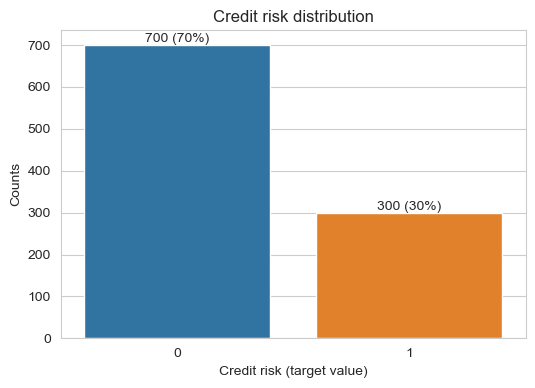

In [51]:
countplot_absrel(df,"Risk","Credit risk (target value)","Counts","Credit risk distribution")

### Let us see the distribution of `Age`

Text(0.5, 0.98, 'Distribution of Age versus Risk')

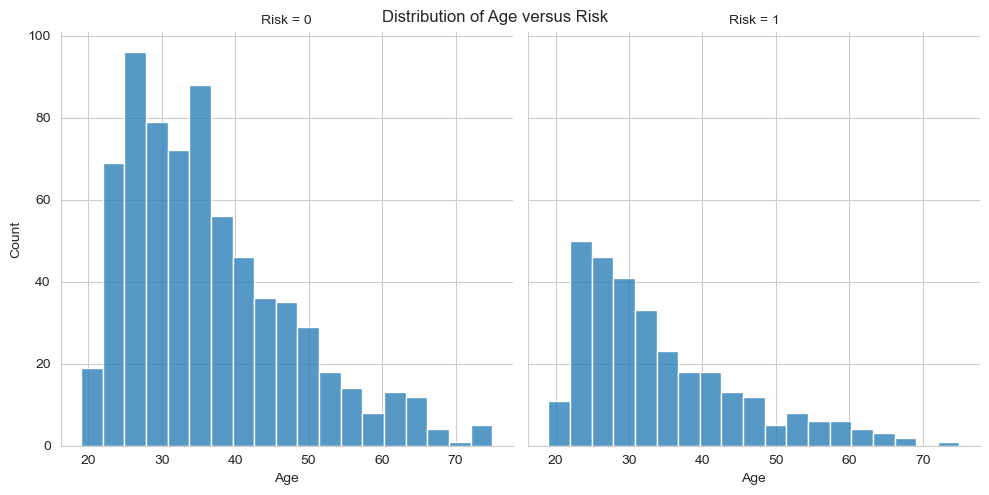

In [52]:
ax = sns.displot(data=df, x='Age', col='Risk')
ax.fig.suptitle('Distribution of Age versus Risk')

[Text(0.5, 1.0, 'Risk by age')]

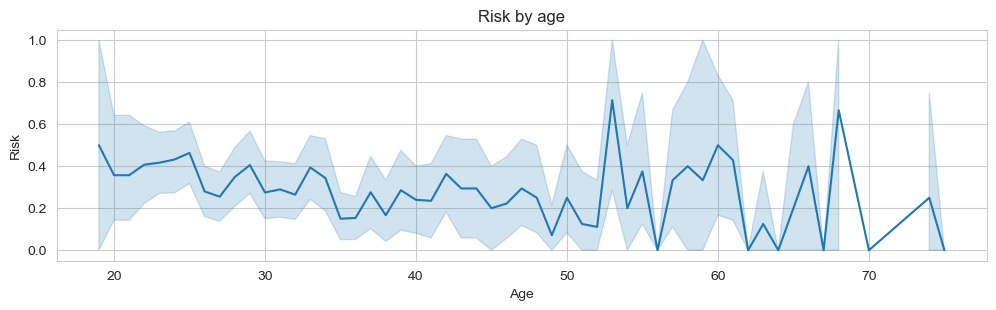

In [53]:
plt.figure(figsize=(12, 3))
sns.lineplot(x="Age", y="Risk", data=df).set(title="Risk by age")

### Let us see the distribution of `Housing`

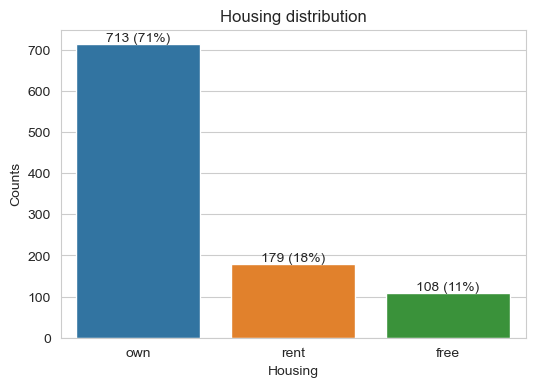

In [54]:
countplot_absrel(df,"Housing","Housing","Counts","Housing distribution")

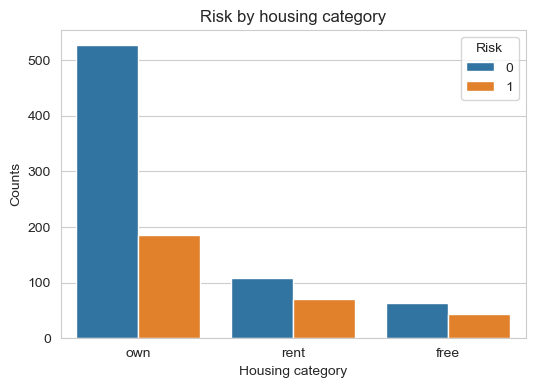

In [55]:
countplot_absrel(df,"Housing","Housing category","Counts","Risk by housing category", hue="Risk",barlabel=False)

[Text(0, 0.5, 'Credit amount (DM)'),
 Text(0.5, 1.0, 'Credit amount by housing type')]

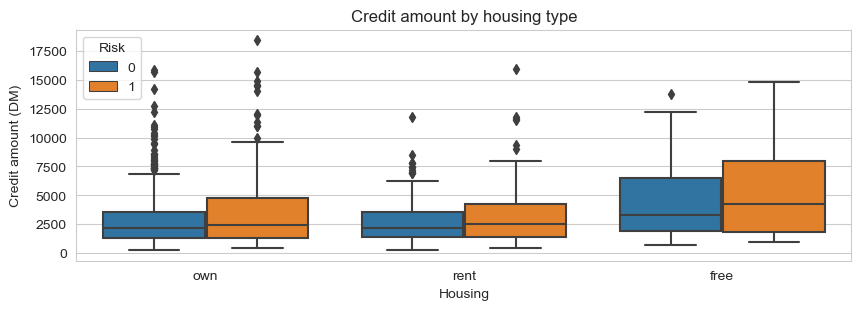

In [56]:
plt.figure(figsize=(10, 3))
sns.boxplot(x="Housing",y="Credit_amount", data=df, hue="Risk", order=["own","rent","free"]).set(ylabel="Credit amount (DM)", title="Credit amount by housing type")

### Let us see the distribution of `Sex`

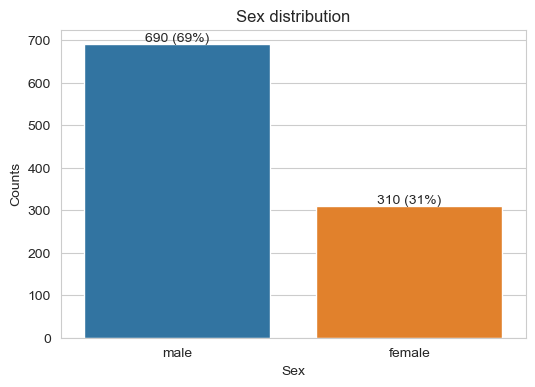

In [57]:
countplot_absrel(df,"Sex","Sex","Counts","Sex distribution")

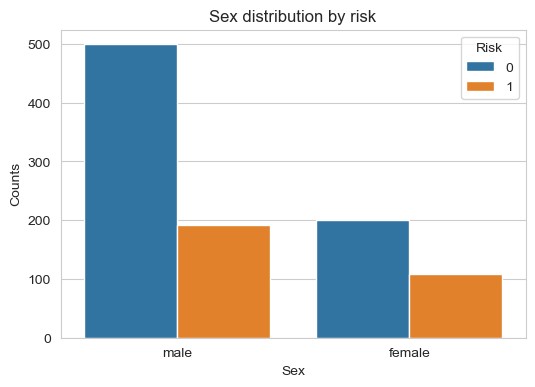

In [58]:
countplot_absrel(df,"Sex","Sex","Counts","Sex distribution by risk",hue="Risk",barlabel=False)

In [59]:
# Get the proportion of risk group for each sex
df.groupby("Sex")['Risk'].value_counts(normalize=True)*100

Sex     Risk
female  0       64.838710
        1       35.161290
male    0       72.318841
        1       27.681159
Name: Risk, dtype: float64

[Text(0, 0.5, 'Credit amount (DM)'), Text(0.5, 1.0, 'Credit amount by sex')]

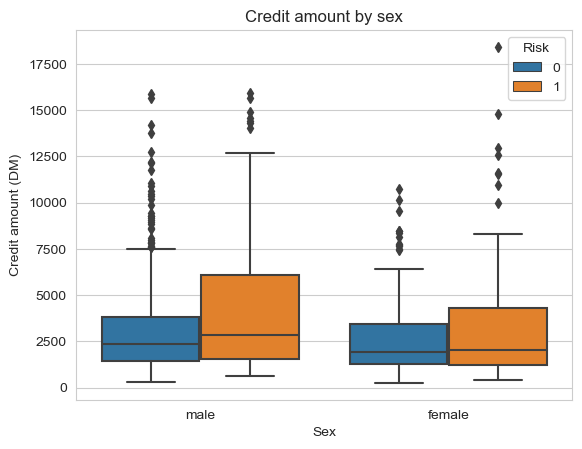

In [60]:
sns.boxplot(x="Sex",y="Credit_amount", data=df, hue="Risk").set(ylabel="Credit amount (DM)",title="Credit amount by sex")

### Let us explore the `Job`

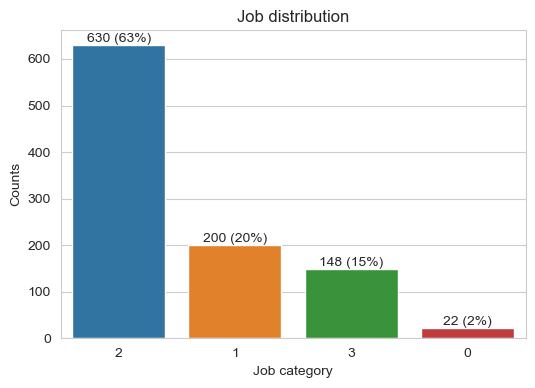

In [61]:
countplot_absrel(df,"Job","Job category","Counts","Job distribution")

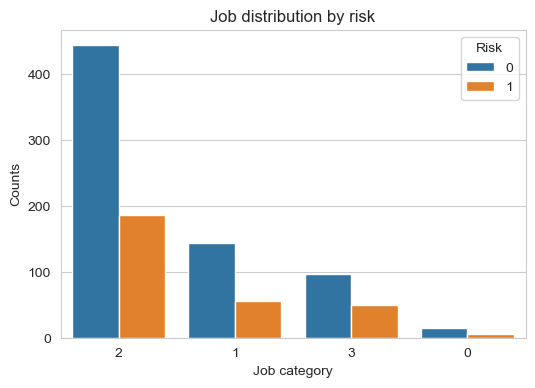

In [62]:
countplot_absrel(df,"Job","Job category","Counts","Job distribution by risk",hue="Risk",barlabel=False)

In [63]:
# Get the proportion of risk group for each job category
df.groupby("Job")['Risk'].value_counts(normalize=True)*100

Job  Risk
0    0       68.181818
     1       31.818182
1    0       72.000000
     1       28.000000
2    0       70.476190
     1       29.523810
3    0       65.540541
     1       34.459459
Name: Risk, dtype: float64

[Text(0.5, 0, 'Job category'),
 Text(0, 0.5, 'Credit amount (DM)'),
 Text(0.5, 1.0, 'Credit amount by job type')]

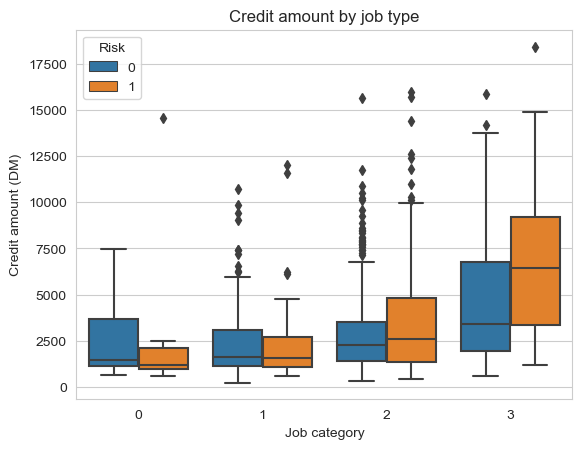

In [64]:
sns.boxplot(x="Job",y="Credit_amount", data=df, hue="Risk").set(xlabel="Job category",ylabel="Credit amount (DM)",title="Credit amount by job type")

### Let us explore the `Saving accounts` and `Checking account`

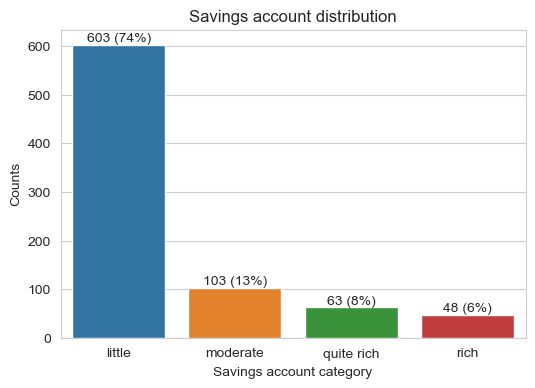

In [65]:
countplot_absrel(df,"Saving_accounts","Savings account category","Counts","Savings account distribution")

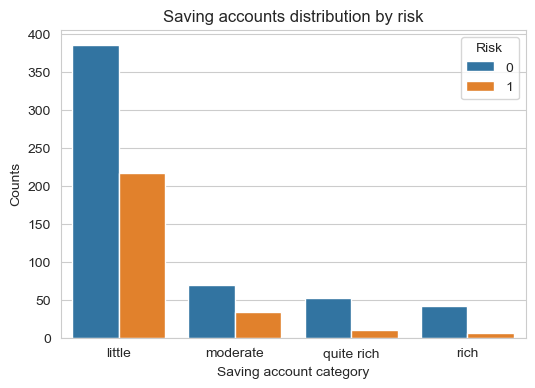

In [66]:
countplot_absrel(df,"Saving_accounts","Saving account category","Counts","Saving accounts distribution by risk",hue="Risk",barlabel=False)

[Text(0.5, 0, 'Saving account category'),
 Text(0, 0.5, 'Credit amount (DM)'),
 Text(0.5, 1.0, 'Credit amount by saving account category')]

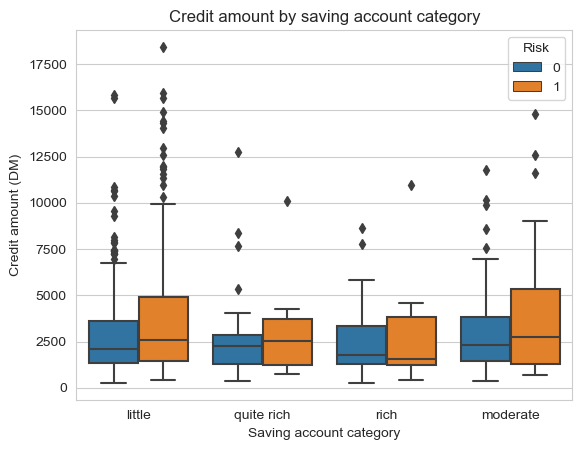

In [67]:
sns.boxplot(x="Saving_accounts",y="Credit_amount", data=df, hue="Risk").set(xlabel="Saving account category",ylabel="Credit amount (DM)",title="Credit amount by saving account category")

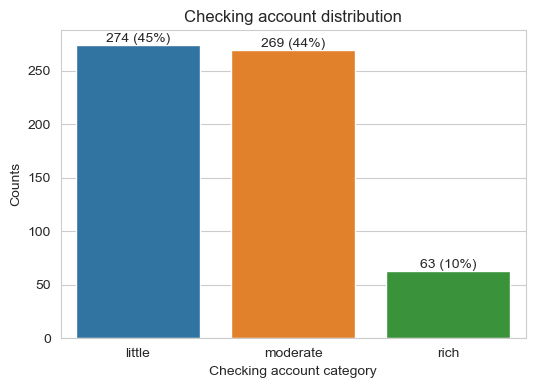

In [68]:
countplot_absrel(df,"Checking_account","Checking account category","Counts","Checking account distribution")

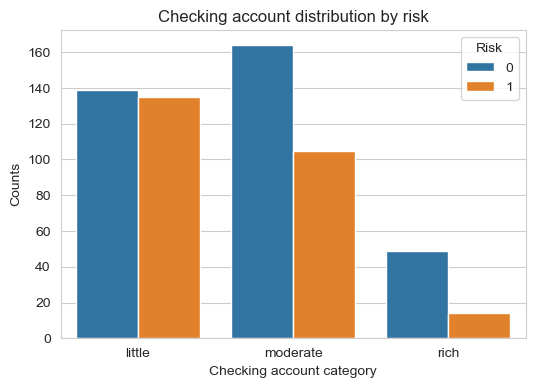

In [69]:
countplot_absrel(df,"Checking_account","Checking account category","Counts","Checking account distribution by risk",hue="Risk",barlabel=False)

[Text(0.5, 0, 'Checking account category'),
 Text(0, 0.5, 'Credit amount (DM)'),
 Text(0.5, 1.0, 'Credit amount by checking account category')]

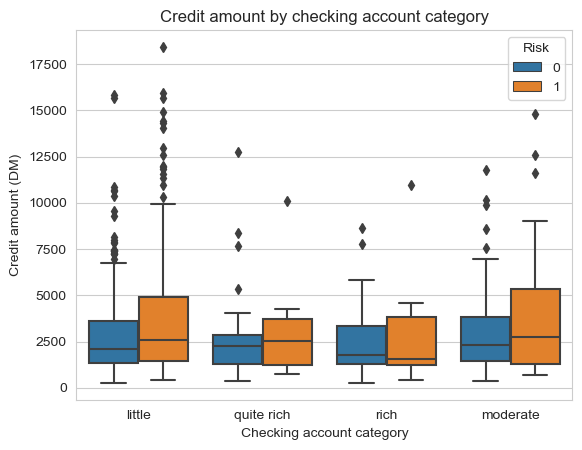

In [70]:
sns.boxplot(x="Saving_accounts",y="Credit_amount", data=df, hue="Risk").set(xlabel="Checking account category",ylabel="Credit amount (DM)",title="Credit amount by checking account category")

### Let us explore the `Purpose` for the credit loan

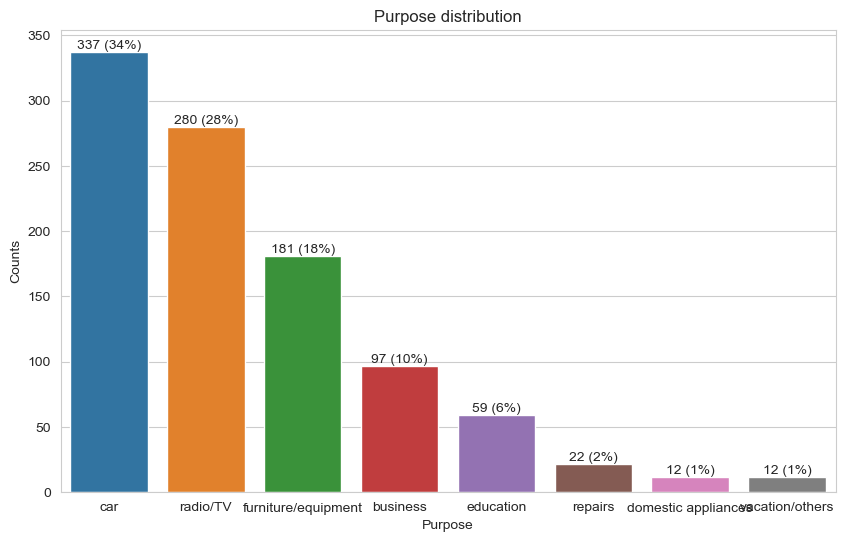

In [71]:
countplot_absrel(df,"Purpose","Purpose","Counts","Purpose distribution",figsize=(10,6))

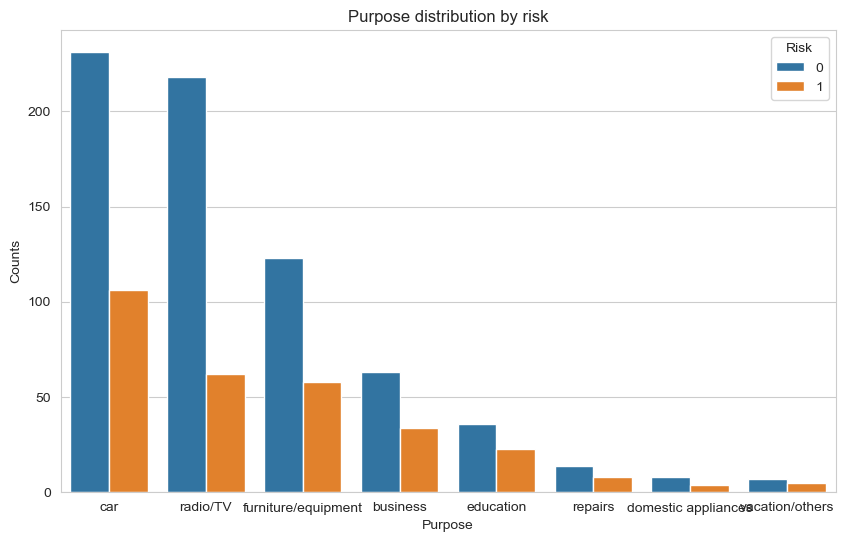

In [72]:
countplot_absrel(df,"Purpose","Purpose","Counts","Purpose distribution by risk",hue="Risk",barlabel=False,figsize=(10,6))

In [73]:
# Get the proportion of risk group for each purpose
df.groupby("Purpose")['Risk'].value_counts(normalize=True)*100

Purpose              Risk
business             0       64.948454
                     1       35.051546
car                  0       68.545994
                     1       31.454006
domestic appliances  0       66.666667
                     1       33.333333
education            0       61.016949
                     1       38.983051
furniture/equipment  0       67.955801
                     1       32.044199
radio/TV             0       77.857143
                     1       22.142857
repairs              0       63.636364
                     1       36.363636
vacation/others      0       58.333333
                     1       41.666667
Name: Risk, dtype: float64

[Text(0, 0.5, 'Credit amount (DM)'),
 Text(0.5, 1.0, 'Credit amount by purpose of credit loan')]

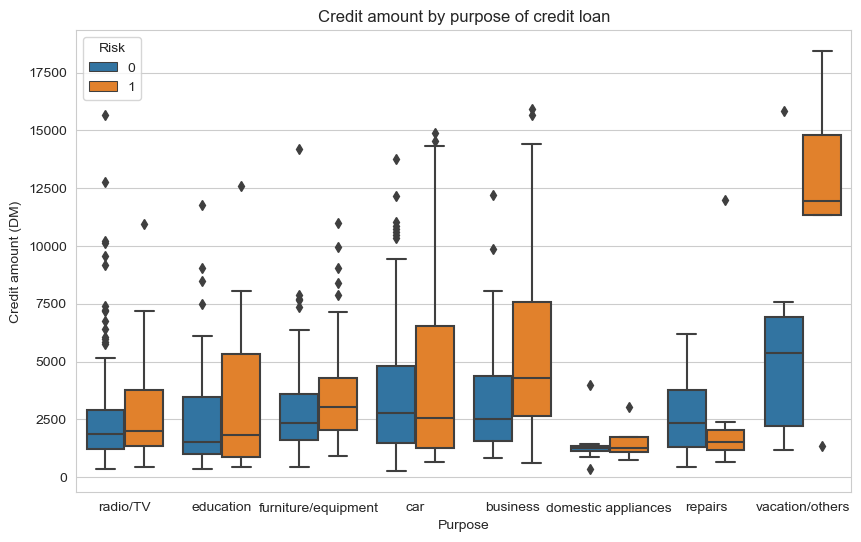

In [74]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="Purpose",y="Credit_amount", data=df, hue="Risk").set(ylabel="Credit amount (DM)",title="Credit amount by purpose of credit loan")

### Let us explore the `Duration`

[Text(0.5, 1.0, 'Risk by duration')]

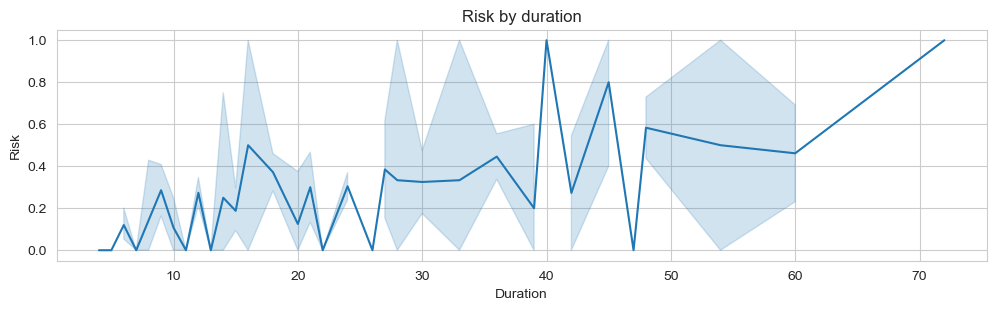

In [75]:
plt.figure(figsize=(12, 3))
sns.lineplot(x="Duration", y="Risk", data=df).set(title="Risk by duration")

### Observations

* 30% of total loans are related to people at the risk group.
* In terms of `Age`, the risk seems to decrease with the increase of age until 50yr. After that, the data seems a bit noisy, which could be explained by the fact there are just few records for age > 50 available in the dataset.
* Majority of loans are for people who own their houses. The risk group is for "rent" and "free" categories in the `Housing` variable.
* Regarding `Sex`, more men take loan than women, but the women show to be more risky, as 35% of this group are considered at-risk, while 27% of the men are in the risk group.
* In terms of `Job`, majority is on the "skilled" category and very few on the "unskilled and non-resident". There is almost no differente in the risk for the different types of job.
* It seems to be a correlation between `Saving accounts` and `Checking accounts` with the target variable `Risk`, as "little" or "moderate" values in such categories shows higher risk.
* In terms of `Purpose`, the loans are used in major cases for buying Cars, Radio/TV, Furniture/equipment, Business and Education. Is it possible to group repairs, domestic appliance with vacation/others, constituting a new "Other" category.
* It also seems there is a correlation between the risk and `Duration`, as long credit durations show high risk.

## Bivariate Distributions

<Figure size 1200x700 with 0 Axes>

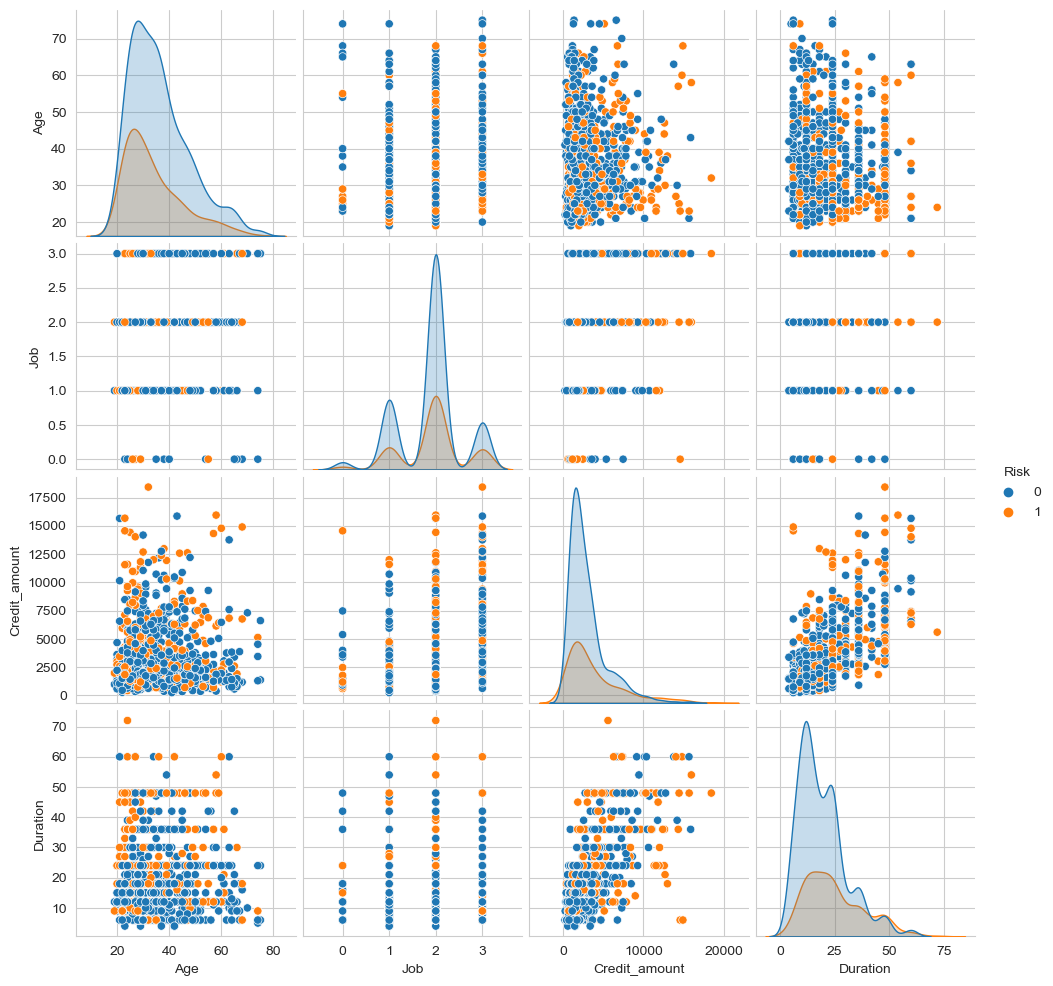

In [76]:
plt.figure(figsize=(12, 7))
sns.pairplot(data=df, hue="Risk")

### Correlation between numerical variables

<Axes: >

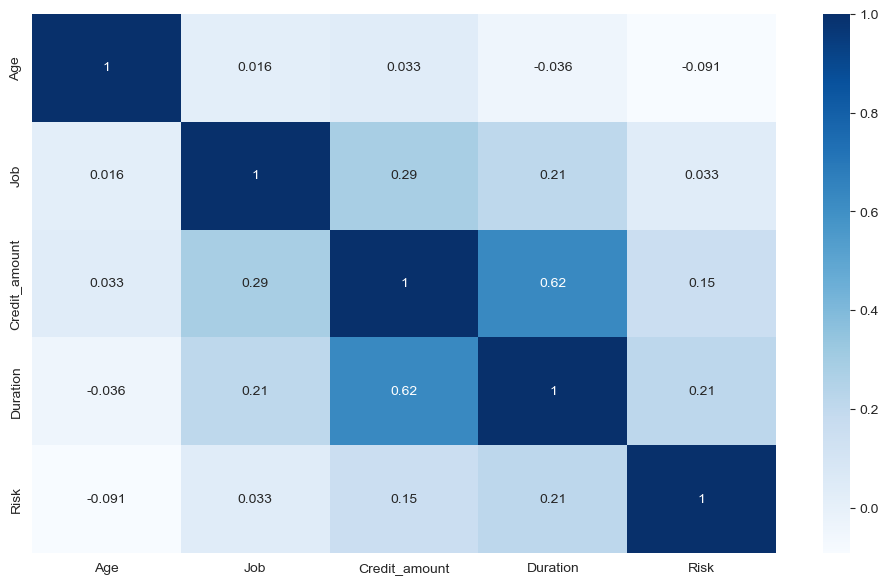

In [77]:
plt.figure(figsize=(12, 7))
sns.heatmap(df.corr(), annot=True, cmap="Blues")

From the heat map above, it is possible to affirm:

* Duration has a positive correlation with credit amount, which would be expected.
* Although the correlations are very low, Duration is the variable that most correlates with risk, followed by Credit amount.

## Processing the data


In [78]:
# let us make the change in the Purpose column, converting "repairs, domestic appliance with vacation/others to a new "Other" category.
dic_purpose = {
    'repairs':'others',
    'domestic appliances':'others',
    'vacation/others':'others'
}

df['Purpose'].replace(dic_purpose, inplace=True)
df['Purpose'].value_counts()

car                    337
radio/TV               280
furniture/equipment    181
business                97
education               59
others                  46
Name: Purpose, dtype: int64

# 5. Building the model
What we want is to create a model that helps the bank wether to approve or not a loan to a prospective applicant. As the output variable is 1 or 0 (Risky or not risky), we will apply Logistic Regression. The column `Risk` is already in binary code in the dataset.

## Model 1

### Creating training and test sets

In [79]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification_statsmodels(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred_temp = model.predict(predictors) > threshold
    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [80]:
# defining a function to plot the confusion_matrix of a classification model

def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Logistic Regression (with statsmodels library)

In [83]:
X = df.drop(["Risk"], axis=1)
Y = df["Risk"]

X = pd.get_dummies(X, drop_first=True)

# adding constant
X = sm.add_constant(X)

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

In [84]:
# fitting logistic regression model
logit = sm.Logit(y_train, X_train.astype(float))
lg = logit.fit(disp=False)

print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:                   Risk   No. Observations:                  700
Model:                          Logit   Df Residuals:                      682
Method:                           MLE   Df Model:                           17
Date:                Tue, 30 May 2023   Pseudo R-squ.:                 0.09155
Time:                        17:51:16   Log-Likelihood:                -391.49
converged:                       True   LL-Null:                       -430.94
Covariance Type:            nonrobust   LLR p-value:                 5.993e-10
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           0.1779      0.699      0.254      0.799      -1.192       1.548
Age                            -0.0216      0.009     -2.486      0.013      -0.

Training performance:


,Accuracy,Recall,Precision,F1
0,0.714286,0.228972,0.583333,0.328859


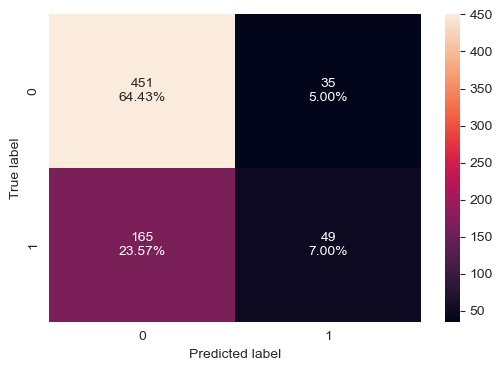

In [89]:
# creating confusion matrix
confusion_matrix_statsmodels(lg, X_train, y_train)

log_reg_model_train_perf1=model_performance_classification_statsmodels(lg, X_train, y_train)
print("Training performance:")
log_reg_model_train_perf1

## Model 2

In this new model, we will perform two modifications in the dataset:
- Drop the column `Job`, as this does not seem to impact `Risk`.
- Drop the NA values from `Saving accounts` and `Checking account`

In [90]:
df2 = df.copy() # Create a copy dfm2 to perform the second model

In [91]:
# Let us drop the column Job
df2.drop("Job",axis=1, inplace=True)

# Let us drop NA values from Saving accounts and Checking account
df2['Saving_accounts'].dropna()
df2['Checking_account'].dropna()

0        little
1      moderate
3        little
4        little
7      moderate
         ...   
992      little
993      little
996      little
998      little
999    moderate
Name: Checking_account, Length: 606, dtype: object

### Logistic Regression (with statsmodels library)

In [92]:
X = df2.drop(["Risk"], axis=1)
Y = df2["Risk"]

X = pd.get_dummies(X, drop_first=True)

# adding constant
X = sm.add_constant(X)

# Splitting data in train and test sets
X_train2, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

In [93]:
# fitting logistic regression model
logit2 = sm.Logit(y_train, X_train2.astype(float))
lg2 = logit2.fit(disp=False)

print(lg2.summary())

                           Logit Regression Results                           
Dep. Variable:                   Risk   No. Observations:                  700
Model:                          Logit   Df Residuals:                      683
Method:                           MLE   Df Model:                           16
Date:                Tue, 30 May 2023   Pseudo R-squ.:                 0.09131
Time:                        17:53:24   Log-Likelihood:                -391.59
converged:                       True   LL-Null:                       -430.94
Covariance Type:            nonrobust   LLR p-value:                 2.858e-10
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           0.0509      0.642      0.079      0.937      -1.207       1.309
Age                            -0.0214      0.009     -2.471      0.013      -0.

Training performance:


,Accuracy,Recall,Precision,F1
0,0.715714,0.238318,0.586207,0.33887


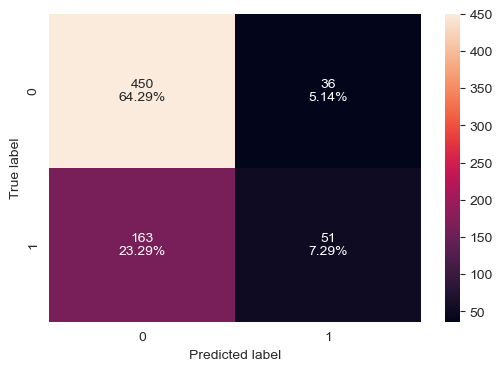

In [94]:
# creating confusion matrix
confusion_matrix_statsmodels(lg2, X_train2, y_train)

log_reg_model_train_perf2=model_performance_classification_statsmodels(lg2, X_train2, y_train)
print("Training performance:")
log_reg_model_train_perf2

## Summary

In [95]:
models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf1.T,
        log_reg_model_train_perf2.T
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Model 1",
    "Model 2",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Model 1,Model 2
Accuracy,0.714286,0.715714
Recall,0.228972,0.238318
Precision,0.583333,0.586207
F1,0.328859,0.338870


# 6. Conclusion

* Both models show very similar performance indicators.
* Although the accuracy for both models is around 71%, as the data is imbalanced (70% no-risk and 30% risk), this is a very poor performance.
* In cases of imbalanced data, it is better to verify Recall indicator. In that case, for all `Risk` labeled as `1`, the model got to make right predictions in only 23% of the events.
* For further improvement, it may be necessary to perform some feature engineering or use a new prediction method.